In [266]:
import pandas as pd
import numpy as np

In [267]:
df = pd.read_csv("../data/train/combined_data.csv")
df.sample(5)

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ,label
97463,-0.378,-0.083,-1.469,74.890,-42.053,-41.870,176.484,12.980,107.276,running
91086,-0.512,0.249,-1.188,-13.123,-197.327,67.627,-179.006,11.761,-135.049,running
100849,0.065,-0.046,-0.325,-37.537,-62.439,-104.187,171.354,19.270,139.867,running
115034,-0.719,0.060,-0.695,-5.737,7.751,-2.563,173.831,45.505,17.699,sitting
6679,-0.624,0.271,-0.887,-44.250,-9.888,-101.929,-167.882,30.509,97.333,climbing


In [268]:
df.shape

(170260, 10)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170260 entries, 0 to 170259
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ax      170260 non-null  float64
 1   ay      170260 non-null  float64
 2   az      170260 non-null  float64
 3   wx      170260 non-null  float64
 4   wy      170260 non-null  float64
 5   wz      170260 non-null  float64
 6   AngleX  170260 non-null  float64
 7   AngleY  170260 non-null  float64
 8   AngleZ  170260 non-null  float64
 9   label   170260 non-null  object 
dtypes: float64(9), object(1)
memory usage: 13.0+ MB


In [270]:
df.describe()

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
count,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000,170260.000000
mean,-0.212845,0.092447,-0.880495,-0.888306,-0.676773,-0.120438,94.730543,14.866423,-13.224977
std,0.553140,0.282003,0.597359,49.965501,65.428640,64.166753,140.125893,25.576858,86.487866
min,-12.522000,-11.078000,-15.465000,-614.380000,-686.646000,-490.479000,-179.995000,-69.911000,-179.995000
25%,-0.655000,-0.022000,-0.987000,-11.719000,-12.085000,-13.733000,160.999000,-4.170500,-82.497500
50%,-0.112000,0.126000,-0.891000,-0.305000,0.122000,0.305000,167.673000,14.683000,-18.913000
75%,0.134000,0.251000,-0.625000,5.737000,6.042000,9.399000,170.497000,35.404500,45.940500
max,9.617000,6.222000,15.990000,513.916000,873.108000,788.513000,179.995000,89.418000,179.995000


In [271]:
df.isnull().sum()

ax        0
ay        0
az        0
wx        0
wy        0
wz        0
AngleX    0
AngleY    0
AngleZ    0
label     0
dtype: int64

In [272]:
df.dropna(inplace=True)

In [273]:
df["label"].value_counts()

label
lying       42399
sitting     35999
running     32899
walking     29999
climbing    28964
Name: count, dtype: int64

In [274]:
df.reset_index(drop=True, inplace=True)

In [275]:
df.sample(5)

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ,label
147183,-0.140,0.147,-1.020,26.550,23.499,64.514,176.957,14.381,1.582,walking
39543,0.058,0.187,-0.987,-0.305,-0.061,0.610,168.662,-3.719,-21.204,lying
13785,0.205,-0.235,-1.689,200.012,-336.182,235.168,-147.090,41.303,156.099,climbing
157913,-0.388,-0.252,-0.776,-25.146,-35.828,-40.161,-170.997,23.588,124.305,walking
169651,0.275,0.229,-1.018,69.702,38.086,-1.526,178.110,-21.182,-130.111,walking


In [276]:
X = df.iloc[:, :-1]
y = df['label']

In [277]:
X.columns

Index(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'AngleX', 'AngleY', 'AngleZ'], dtype='object')

In [278]:
X.shape

(170260, 9)

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
0,-1.115733,-0.661155,0.606831,1.018232,0.856444,-0.347215,-1.743541,1.107511,-0.820372
1,-1.115733,-0.845551,0.677140,0.491747,0.717452,-0.391926,-1.742606,1.088588,-0.818915
2,-1.157314,-0.845551,0.677140,0.491747,0.717452,-0.391926,-1.741700,1.069899,-0.817516
3,-1.157314,-1.214343,0.747450,-0.067721,0.427334,-0.418560,-1.742057,1.057466,-0.814337
4,-1.251323,-1.214343,0.747450,-0.067721,0.427334,-0.418560,-1.742406,1.045424,-0.811226


In [280]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [281]:
df.columns

Index(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'AngleX', 'AngleY', 'AngleZ',
       'label'],
      dtype='object')

In [319]:
# Extracting features and labels
X = X_scaled_df[['ax', 'ay', 'az', 'wx', 'wy',
                 'wz', 'AngleX', 'AngleY', 'AngleZ']].values
y = df['label'].values

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Sliding window parameters
window_size = 128  # Adjust as needed
stride = 16  # Adjust as needed

# Generate sequences using sliding windows
sequences = []
labels = []

for i in range(0, len(X) - window_size + 1, stride):
    window = X[i:i+window_size]
    label = y_categorical[i+window_size-1]
    if len(window) == window_size:
        sequences.append(window)
        labels.append(label)


X_sliding = np.array(sequences)
y_sliding = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X_sliding, y_sliding, test_size=0.2, random_state=42, shuffle=True)

In [320]:
# Build the CNN model
model = Sequential()

model.add(Conv1D(128, kernel_size=3, activation='relu',
          input_shape=(window_size, X_scaled.shape[1])))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [321]:
from tensorflow.keras.optimizers import Adam, SGD
# Compile the model
custom_learning_rate = 0.01
custom_optimizer = SGD(learning_rate=custom_learning_rate)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [322]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [323]:
# Train the model
history = model.fit(X_train, y_train, epochs=250,
                    validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/250
26/26 [==============================] - 1s 30ms/step - loss: 1.5649 - accuracy: 0.2354 - val_loss: 1.5101 - val_accuracy: 0.1940
Epoch 2/250
26/26 [==============================] - 1s 20ms/step - loss: 1.4533 - accuracy: 0.3574 - val_loss: 1.4083 - val_accuracy: 0.4129
Epoch 3/250
26/26 [==============================] - 1s 21ms/step - loss: 1.3723 - accuracy: 0.4807 - val_loss: 1.3031 - val_accuracy: 0.6667
Epoch 4/250
26/26 [==============================] - 1s 20ms/step - loss: 1.2713 - accuracy: 0.6214 - val_loss: 1.2161 - val_accuracy: 0.6965
Epoch 5/250
26/26 [==============================] - 1s 20ms/step - loss: 1.1787 - accuracy: 0.6862 - val_loss: 1.1286 - val_accuracy: 0.6567
Epoch 6/250
26/26 [==============================] - 0s 19ms/step - loss: 1.0616 - accuracy: 0.7173 - val_loss: 1.0688 - val_accuracy: 0.6567
Epoch 7/250
26/26 [==============================] - 1s 19ms/step - loss: 0.9486 - accuracy: 0.7410 - val_loss: 0.8825 - val_accuracy: 0.7861
Epoch 

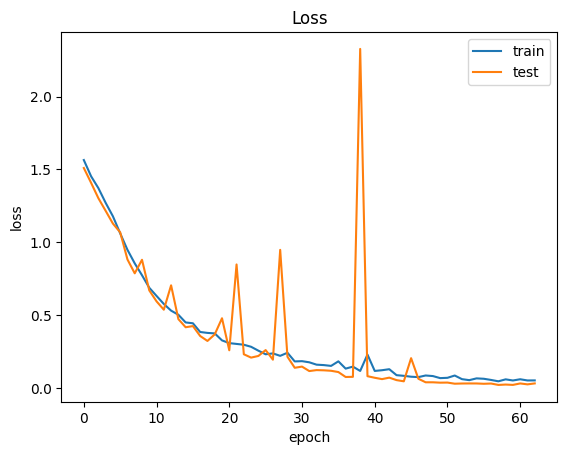

In [324]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

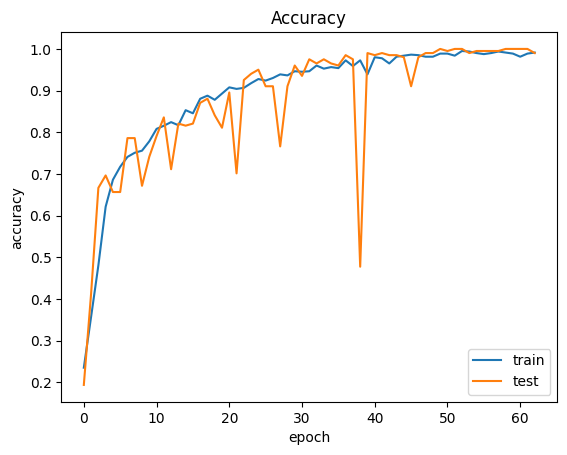

In [325]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

Making Predictions


In [326]:
# Read data from walking.csv, creating df, apply sliding windows on data and make prediction
df = pd.read_csv("../data/test/test1.csv")
# df['label'] = 'walking'

X = df.iloc[:, :-1]
y = df['label']

In [327]:
df.shape

(16184, 10)

In [328]:
# applying snadradscaler
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [329]:
df['label'].count()

16184

In [330]:
y_test = df['label'].values
print(y_test.shape)

(16184,)


In [333]:
# Create a sliding window of 10 seconds for the data
window_size = 128
stride = 64

# Generate sequences using sliding windows
sequences = []
labels = []
for i in range(len(X_scaled_df) - window_size):
    window = X_scaled_df[i:i+window_size]
    if len(window) == window_size:
        sequences.append(window)

X_sliding = np.array(sequences)

# Make predictions
y_pred = model.predict(X_sliding)
y_pred = np.argmax(y_pred, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
print("Predicted labels are : ", y_pred)

502/502 [==============================] - 3s 7ms/step
Predicted labels are :  ['climbing' 'climbing' 'climbing' ... 'walking' 'walking' 'walking']


In [340]:
print(y_test.shape)
print(y_pred.shape)

y_test = y_test[:y_pred.shape[0]]

(16184,)
(16056,)


In [341]:
# checking testing accuracy
from sklearn.metrics import accuracy_score
print("Testing accuracy is : ", accuracy_score(y_test, y_pred))

Testing accuracy is :  0.9673019431988041


In [ ]:
import pickle

pickle.dump(model, open('../dumpFiles/CNN_model.pkl', 'wb'))
pickle.dump(scaler, open('../dumpFiles/scaler.pkl', 'wb'))
pickle.dump(label_encoder, open('../dumpFiles/label_encoder.pkl', 'wb'))